In [547]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [548]:
d1 = 183.3
d2 = 737.31
d3 = 387.8
d4 = 95.5
d5 = 115.5
d6 = 76.8
alpha = sp.pi/2



In [ ]:
thetai = sp.Symbol('theta_i')
theta1 = sp.Symbol('theta_1')
theta2 = sp.Symbol('theta_2')
theta3 = sp.Symbol('theta_3')
theta4 = sp.Symbol('theta_4')
theta5 = sp.Symbol('theta_5')
theta6 = sp.Symbol('theta_6')
t = sp.Symbol('t')
ai = sp.Symbol('a_i')
di = sp.Symbol('d_i')
alphai = sp.Symbol('alpha_i')
pi = sp.Symbol('pi')



In [550]:
dh_table = {
    "": ["to 1", "to 2", "to 3", "to 4", "to 5", "to 6"],
    thetai: [theta1, pi/2 + theta2, theta3, pi/2 + theta4, theta5, theta6],
    ai: [0, d2, d3, 0, 0, 0],
    di: [d1, 0, 0, -d4, d5, 76.8],
    alphai: [alpha, 0, 0, alpha, -alpha, 0]

}

df = pd.DataFrame(dh_table)
print(df)

                theta_i     a_i    d_i alpha_i
0  to 1         theta_1    0.00  183.3    pi/2
1  to 2  pi/2 + theta_2  737.31    0.0       0
2  to 3         theta_3  387.80    0.0       0
3  to 4  pi/2 + theta_4    0.00  -95.5    pi/2
4  to 5         theta_5    0.00  115.5   -pi/2
5  to 6         theta_6    0.00   76.8       0


In [568]:
A1tz = sp.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,d1],[0,0,0,1]])
A1rz = sp.Matrix([[sp.cos(theta1),-sp.sin(theta1),0,0],[sp.sin(theta1),sp.cos(theta1),0,0],[0,0,1,0],[0,0,0,1]])
A1rx = sp.Matrix([[1,0,0,0],[0,sp.cos(alpha),-sp.sin(alpha),0],[0,sp.sin(alpha),sp.cos(alpha),0],[0,0,0,1]])
A1 = A1tz*A1rz*A1rx


In [552]:
A2ty = sp.Matrix([[1,0,0,0],[0,1,0,d2],[0,0,1,0],[0,0,0,1]])
A2rz = sp.Matrix([[sp.cos((sp.pi/2)+theta2),-sp.sin((sp.pi/2)+theta2),0,0],[sp.sin((sp.pi/2)+theta2),sp.cos((sp.pi/2)+theta2),0,0],[0,0,1,0],[0,0,0,1]])
A2 = A2ty*A2rz

In [553]:
A3tx = sp.Matrix([[1,0,0,-d3],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
A3rz = sp.Matrix([[sp.cos(theta3),-sp.sin(theta3),0,0],[sp.sin(theta3),sp.cos(theta3),0,0],[0,0,1,0],[0,0,0,1]])
A3 = A3tx*A3rz

In [554]:
A4tz = sp.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,d4],[0,0,0,1]])
A4rz = sp.Matrix([[sp.cos((sp.pi/2)+theta4),-sp.sin((sp.pi/2)+theta4),0,0],[sp.sin((sp.pi/2)+theta4),sp.cos((sp.pi/2)+theta4),0,0],[0,0,1,0],[0,0,0,1]])
A4rx = sp.Matrix([[1,0,0,0],[0,sp.cos(alpha),-sp.sin(alpha),0],[0,sp.sin(alpha),sp.cos(alpha),0],[0,0,0,1]])
A4 = A4tz*A4rz*A4rx

In [555]:
A5tz = sp.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,d5],[0,0,0,1]])
A5rz = sp.Matrix([[sp.cos(theta5),-sp.sin(theta5),0,0],[sp.sin(theta5),sp.cos(theta5),0,0],[0,0,1,0],[0,0,0,1]])
A5rx = sp.Matrix([[1,0,0,0],[0,sp.cos(-alpha),-sp.sin(-alpha),0],[0,sp.sin(-alpha),sp.cos(-alpha),0],[0,0,0,1]])
A5 = A5tz*A5rz*A5rx

In [556]:
A6tz = sp.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,d6],[0,0,0,1]])
A6rz = sp.Matrix([[sp.cos(theta6),-sp.sin(theta6),0,0],[sp.sin(theta5),sp.cos(theta6),0,0],[0,0,1,0],[0,0,0,1]])
A6 = A6tz*A6rz

In [557]:
A = A1*A2*A3*A4*A5*A6

In [ ]:
O = sp.zeros(3,7)
a_array = [1,A1,A2,A3,A4,A5,A6]
product = sp.eye(4)
for i in range(1,7):
    product = product*a_array[i]
    O[:,i] = sp.Matrix([
        [(product)[0,3]],
        [(product)[1,3]],
        [(product)[2,3]]])




z = sp.zeros(3,7)
z[:,0] = sp.Matrix([[0],[0],[1]])
for i in range(1,7):
    z[:,i] = sp.Matrix([
        [(a_array[i])[0,2]],
        [(a_array[i])[1,2]],
        [(a_array[i])[2,2]]])


In [559]:
j = sp.zeros(6,6)
for i in range(0,6):
    j[:,i] = sp.Matrix([[(z.col(i)).cross((O.col(6))-(O.col(i)))],[z.col(i)]])


In [560]:
increment = 0.1
duration = 20
arraysize = int(duration/increment)
time = np.arange(0, duration, increment)
ee_x_initial = 0
ee_y_initial = -172.3-45
ee_z_initial = d1+d2+d3+d5

path1_x_final = -50
path1_y_final = ee_y_initial - 10
path1_z_final = 1350

path1_distance = sp.sqrt(((ee_x_initial-path1_x_final)**2)+((ee_y_initial-path1_y_final)**2)+(ee_z_initial-path1_z_final)**2)
path2_distance = 50*sp.pi
path3_distance = 50
path4_distance = 100
path5_distance = 50
path6_distance = path1_distance
total_distance = path1_distance+path2_distance+path3_distance+path4_distance+path5_distance+path6_distance

path1_time = (path1_distance/total_distance)*duration
path2_time = (path2_distance/total_distance)*duration
path3_time = (path3_distance/total_distance)*duration
path4_time = (path4_distance/total_distance)*duration
path5_time = (path5_distance/total_distance)*duration
path6_time = (path6_distance/total_distance)*duration

path1_start = 0
path2_start = path1_time.round(1)
path3_start = (path2_start+path2_time).round(1)
path4_start = (path3_start+path3_time).round(1)
path5_start = (path4_start+path4_time).round(1)
path6_start = (path5_start+path5_time).round(1)




In [570]:

path1_xdot = (path1_x_final-ee_x_initial)/path1_time
path1_ydot = (path1_y_final-ee_y_initial)/path1_time
path1_zdot = (path1_z_final-ee_z_initial)/path1_time

path2_x = path1_x_final+(50*sp.cos((sp.pi/path2_time)*t))
path2_y = path1_y_final
path2_z = path1_z_final+(50*sp.sin((sp.pi/path2_time)*t))
path2_xdot = sp.diff(path2_x,t)
path2_ydot = sp.diff(path2_y,t)
path2_zdot = sp.diff(path2_z,t)

path3_xdot = 0
path3_ydot = 0
path3_zdot = -50/path3_time

path4_xdot = -100/path4_time
path4_ydot = 0
path4_zdot = 0

path5_xdot = 0
path5_ydot = 0
path5_zdot = 50/path5_time

path6_xdot = -path1_xdot
path6_ydot = -path1_ydot
path6_zdot = -path1_zdot

XDOT = sp.Matrix([
    [path1_xdot, path2_xdot, path3_xdot, path4_xdot, path5_xdot, path6_xdot],
    [path1_ydot, path2_ydot, path3_ydot, path4_ydot, path5_ydot, path6_ydot],
    [path1_zdot, path2_zdot, path3_zdot, path4_zdot, path5_zdot, path6_zdot],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]])

# XDOT_path1 = sp.Matrix([[path1_xdot],[path1_ydot],[path1_zdot],[0],[0],[0]])
# XDOT_path2 = sp.Matrix([[path2_xdot],[path2_ydot],[path2_zdot],[0],[0],[0]])
# XDOT_path3 = sp.Matrix([[path3_xdot],[path3_ydot],[path3_zdot],[0],[0],[0]])
# XDOT_path4 = sp.Matrix([[path4_xdot],[path4_ydot],[path4_zdot],[0],[0],[0]])
# XDOT_path5 = sp.Matrix([[path5_xdot],[path5_ydot],[path5_zdot],[0],[0],[0]])
# XDOT_path6 = sp.Matrix([[path6_xdot],[path6_ydot],[path6_zdot],[0],[0],[0]])




In [562]:

path1_arraysize = int(path1_time/increment)
path2_arraysize = int(path2_time/increment)
path3_arraysize = int(path3_time/increment)
path4_arraysize = int(path4_time/increment)
path5_arraysize = int(path5_time/increment)
path6_arraysize = int(path6_time/increment)

In [ ]:
jinv_initial = (j.subs([
    (theta1,0),
    (theta2,0),
    (theta3,0),
    (theta4,0),
    (theta5,0),
    (theta6,0)])).pinv()

thetadot_initial = jinv_initial*XDOT[:,0]


path2_timearray = np.arange(path2_start, path2_start+path2_time, increment)

path1_theta1_array = [0]*path1_arraysize 
path1_theta2_array = [0]*path1_arraysize 
path1_theta3_array = [0]*path1_arraysize 
path1_theta4_array = [0]*path1_arraysize
path1_theta5_array = [0]*path1_arraysize
path1_theta6_array = [0]*path1_arraysize


path1_thetadot1_array = [(thetadot_initial[0])]*path1_arraysize 
path1_thetadot2_array = [(thetadot_initial[1])]*path1_arraysize 
path1_thetadot3_array = [(thetadot_initial[2])]*path1_arraysize 
path1_thetadot4_array = [(thetadot_initial[3])]*path1_arraysize 
path1_thetadot5_array = [(thetadot_initial[4])]*path1_arraysize 
path1_thetadot6_array = [(thetadot_initial[5])]*path1_arraysize 







In [564]:




for i in range(1, path1_arraysize):
    path1_theta1_array[i] = (path1_theta1_array[i-1]+(path1_thetadot1_array[i-1]*increment)).round(5)
    path1_theta2_array[i] = (path1_theta2_array[i-1]+(path1_thetadot2_array[i-1]*increment)).round(5)
    path1_theta3_array[i] = (path1_theta3_array[i-1]+(path1_thetadot3_array[i-1]*increment)).round(5)
    path1_theta4_array[i] = (path1_theta4_array[i-1]+(path1_thetadot4_array[i-1]*increment)).round(5)
    path1_theta5_array[i] = (path1_theta5_array[i-1]+(path1_thetadot5_array[i-1]*increment)).round(5)
    path1_theta6_array[i] = (path1_theta6_array[i-1]+(path1_thetadot6_array[i-1]*increment)).round(5)
    jsubs = j.subs([(theta1,path1_theta1_array[i]),(theta2,path1_theta2_array[i]),(theta3,path1_theta3_array[i]),(theta4,path1_theta4_array[i]),(theta5,path1_theta5_array[i]),(theta6,path1_theta6_array[i])])
    jinv = jsubs.pinv()
    thetadot = jinv*XDOT_path1
    path1_thetadot1_array[i] = thetadot[0]
    path1_thetadot2_array[i] = thetadot[1]
    path1_thetadot3_array[i] = thetadot[2]
    path1_thetadot4_array[i] = thetadot[3]
    path1_thetadot5_array[i] = thetadot[4]
    path1_thetadot6_array[i] = thetadot[5]




In [565]:

path2_theta1_array = [path1_theta1_array[-1]]*path2_arraysize 
path2_theta2_array = [path1_theta2_array[-1]]*path2_arraysize 
path2_theta3_array = [path1_theta3_array[-1]]*path2_arraysize 
path2_theta4_array = [path1_theta4_array[-1]]*path2_arraysize
path2_theta5_array = [path1_theta5_array[-1]]*path2_arraysize
path2_theta6_array = [path1_theta6_array[-1]]*path2_arraysize

path2_thetadot1_array = [path1_thetadot1_array[-1]]*path2_arraysize 
path2_thetadot2_array = [path1_thetadot2_array[-1]]*path2_arraysize 
path2_thetadot3_array = [path1_thetadot3_array[-1]]*path2_arraysize 
path2_thetadot4_array = [path1_thetadot4_array[-1]]*path2_arraysize 
path2_thetadot5_array = [path1_thetadot5_array[-1]]*path2_arraysize 
path2_thetadot6_array = [path1_thetadot6_array[-1]]*path2_arraysize 



for i in range(1, path2_arraysize):
    path2_theta1_array[i] = (path2_theta1_array[i-1]+(path2_thetadot1_array[i-1]*increment)).round(5)
    path2_theta2_array[i] = (path2_theta2_array[i-1]+(path2_thetadot2_array[i-1]*increment)).round(5)
    path2_theta3_array[i] = (path2_theta3_array[i-1]+(path2_thetadot3_array[i-1]*increment)).round(5)
    path2_theta4_array[i] = (path2_theta4_array[i-1]+(path2_thetadot4_array[i-1]*increment)).round(5)
    path2_theta5_array[i] = (path2_theta5_array[i-1]+(path2_thetadot5_array[i-1]*increment)).round(5)
    path2_theta6_array[i] = (path2_theta6_array[i-1]+(path2_thetadot6_array[i-1]*increment)).round(5)
    jsubs = j.subs([(theta1,path2_theta1_array[i]),(theta2,path2_theta2_array[i]),(theta3,path2_theta3_array[i]),(theta4,path2_theta4_array[i]),(theta5,path2_theta5_array[i]),(theta6,path2_theta6_array[i])])
    jinv = jsubs.pinv()
    thetadot = jinv*(XDOT_path2.subs([(t,path2_timearray[i-1])]))
    path2_thetadot1_array[i] = thetadot[0]
    path2_thetadot2_array[i] = thetadot[1]
    path2_thetadot3_array[i] = thetadot[2]
    path2_thetadot4_array[i] = thetadot[3]
    path2_thetadot5_array[i] = thetadot[4]
    path2_thetadot6_array[i] = thetadot[5]




In [571]:

# link1x2array = [0]*path1_arraysize
# link1y2array = [0]*path1_arraysize
# link1z2array = [0]*path1_arraysize
# for i in range(0, path1_arraysize):
#     link1x2array[i] = -172.3*sp.cos(path1_theta1_array[i])
#     link1y2array[i] = -172.3*sp.sin(path1_theta1_array[i])

# link2x2array = [0]*path1_arraysize
# link2y2array = [0]*path1_arraysize
# link2z2array = [0]*path1_arraysize

# for i in range(0,path1_arraysize):
#     link2x2array[i] = 737.31*sp.cos(path1_theta2_array[i])
#     link2z2array[i] = 737.31*sp.sin(path1_theta2_array[i])


# i = 0
# while i < path1_arraysize:
#     plt.clf()
#     plt.plot([0, link2x2array[i]],[0, link2z2array[i]])
#     plt.axis('square')
#     plt.grid(True)
#     plt.xlim([-500,500])
#     plt.ylim([-500,500])
#     plt.gca().set_aspect('equal', adjustable='box')
#     i = i+1
#     plt.pause(0.05)   


/tmp/ipykernel_3467/2324897361.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter([0,link1x2array[i]], [0,link1y2array[i]], [0,link1z2array[i]], cmap='viridis')


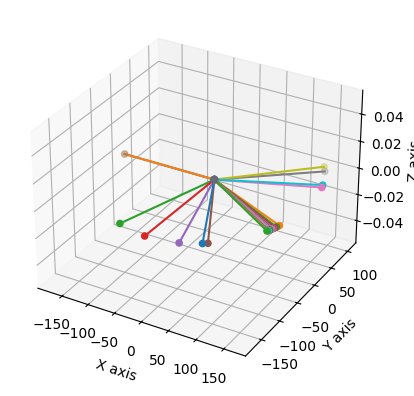

In [584]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate data
link1x2array = [0]*path1_arraysize
link1y2array = [0]*path1_arraysize
link1z2array = [0]*path1_arraysize
for i in range(0, path1_arraysize):
    link1x2array[i] = -172.3*sp.cos(path1_theta1_array[i])
    link1y2array[i] = -172.3*sp.sin(path1_theta1_array[i])


# Plot surface
for i in range(0,path1_arraysize):
    
    ax.scatter([0,link1x2array[i]], [0,link1y2array[i]], [0,link1z2array[i]], cmap='viridis')
    ax.plot([0,link1x2array[i]], [0, link1y2array[i]], [0, link1z2array[i]])
   


# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show plot
plt.show()


